In [147]:
# Import packages
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from spatialdata_io import visium
import os
import numpy as np
import anndata as ad
#import igraph
import leidenalg
from scipy import stats
from IPython.display import display

import json
from spatialdata import SpatialData
from spatialdata.models import Image2DModel
from spatialdata_io import visium
import spatialdata_plot
from matplotlib.lines import Line2D

# Load the data + create sdata object

In [148]:
# Set working directory
working_dir = os.getcwd()
data_path = working_dir
print(data_path)


# Load the visium data (Healthy Mouse Liver_Mouse_001_Sample_001) into a spatial data object
sdata = visium(data_path,dataset_id="GSM5764414_JBO001")
adata = sdata.table
print(sdata)

# Load the annotation file of the mouse steady-state (StSt) Visium data (obtained from GSE192741)
annot = pd.read_csv('annot_mouseStStVisium.csv')

#select sample 'JBO1'import spatialdata as sd
subset_annot = annot[annot['sample'] == 'JBO1'] 
subset_annot['spot'] = subset_annot['spot'].str[:-2]

/home/sarah/Documents/Design_project/spotless-benchmark/proportions/visium
INFO     reading                                                                                                   
         /home/sarah/Documents/Design_project/spotless-benchmark/proportions/visium/filtered_feature_bc_matrix.h5  
SpatialData object
├── Images
│     ├── 'GSM5764414_JBO001_hires_image': DataArray[cyx] (3, 2000, 1896)
│     └── 'GSM5764414_JBO001_lowres_image': DataArray[cyx] (3, 600, 569)
├── Shapes
│     └── 'GSM5764414_JBO001': GeoDataFrame shape: (1646, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (1646, 31053)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        GSM5764414_JBO001_hires_image (Images), GSM5764414_JBO001 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        GSM5764414_JBO001_lowres_image (Images), GSM5764414_JBO001 (Shapes)
    ▸ 'global', with elements:
        GSM5764414_JBO001 (Shapes)


/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata/models/models.py:1048: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/tmp/ipykernel_4291/2778958355.py:9: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  adata = sdata.table
/tmp/ipykernel_4291/2778958355.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [149]:
# Only select spot_ids in the spatial data object that are present in the annotation file
sdata.table.obs['spot_ind'] = sdata.table.obs.index
filtered_obs  = sdata.table.obs[sdata.table.obs['spot_ind'].isin(subset_annot['spot'])]
sdata_filtered = sdata.table[sdata.table.obs['spot_ind'].isin(subset_annot['spot']), :]
del sdata.tables['table']
sdata.table = sdata_filtered
print(sdata.table)

# Only keep spot_ids in the shapes present in the annotation file
sdata.shapes['GSM5764414_JBO001']['spot_id'] = sdata.shapes['GSM5764414_JBO001'].index
filtered_shapes = sdata.shapes['GSM5764414_JBO001'][sdata.shapes['GSM5764414_JBO001']['spot_id'].isin(sdata.table.obs['spot_id'])]
del sdata.shapes['GSM5764414_JBO001']
sdata.shapes['GSM5764414_JBO001'] = filtered_shapes

View of AnnData object with n_obs × n_vars = 1293 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'spot_ind'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'


/tmp/ipykernel_4291/2644637378.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs['spot_ind'] = sdata.table.obs.index
/tmp/ipykernel_4291/2644637378.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  filtered_obs  = sdata.table.obs[sdata.table.obs['spot_ind'].isin(subset_annot['spot'])]
/tmp/ipykernel_4291/2644637378.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata_filtered = sdata.table[sdata.table.obs['spot_ind'].isin(subset_annot['spot']), :]
/tmp/ipykernel_4291/2644637378.py:6: DeprecationWarning: Table setter will be deprecated with SpatialData version 0.1, use tables instead.
  sdata.table = sdata_filtered
/tmp/ipykernel_4291/2644637378.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(

In [122]:
sdata.table.obs

/tmp/ipykernel_4291/4204772674.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs


,in_tissue,array_row,array_col,spot_id,region,spot_ind
AAACACCAATAACTGC-1,1,59,19,1,GSM5764414_JBO001,AAACACCAATAACTGC-1
AAACATTTCCCGGATT-1,1,61,97,2,GSM5764414_JBO001,AAACATTTCCCGGATT-1
AAACCCGAACGAAATC-1,1,45,115,3,GSM5764414_JBO001,AAACCCGAACGAAATC-1
AAACCGGGTAGGTACC-1,1,42,28,4,GSM5764414_JBO001,AAACCGGGTAGGTACC-1
AAACCGTTCGTCCAGG-1,1,52,42,5,GSM5764414_JBO001,AAACCGTTCGTCCAGG-1
...,...,...,...,...,...,...
TTGTGGTGGTACTAAG-1,1,63,95,1639,GSM5764414_JBO001,TTGTGGTGGTACTAAG-1
TTGTGTATGCCACCAA-1,1,56,60,1640,GSM5764414_JBO001,TTGTGTATGCCACCAA-1
TTGTTGTGTGTCAAGA-1,1,31,77,1642,GSM5764414_JBO001,TTGTTGTGTGTCAAGA-1
TTGTTTCATTAGTCTA-1,1,60,30,1644,GSM5764414_JBO001,TTGTTTCATTAGTCTA-1


In [150]:
# read csv data
assig = pd.read_csv("spots_and_parts.csv")
assig.index = assig['Unnamed: 0'].str[:-2]
assig['part'] = assig['part'].astype(int)
print(assig)

# Add parts to the data
sdata.table.obs = sdata.table.obs.join(assig['part'].astype("category"))

#overview data_characteristics
#Matrix X: for each spot it contains the number of UMI counts for each gen
#each RNA molecule gets a different UMI
sdata.table.obs["total_n_UMI_per_spot"] = sdata.table.X.sum(axis=1).A1 #The total number of UMI's per spot
sdata.table.var["n_spots_by_counts"] = (sdata.table.X > 0).sum(axis=0).A1 #The total number of different spot that contains a certain gene.
sdata.table.obs["n_genes_by_counts"] = (sdata.table.X > 0).sum(axis=1).A1 #The number of different genes in a spot

                              Unnamed: 0  part
Unnamed: 0                                    
AAACACCAATAACTGC-1  AAACACCAATAACTGC-1_1     2
AAACATTTCCCGGATT-1  AAACATTTCCCGGATT-1_1     3
AAACCCGAACGAAATC-1  AAACCCGAACGAAATC-1_1     1
AAACCGGGTAGGTACC-1  AAACCGGGTAGGTACC-1_1     0
AAACCGTTCGTCCAGG-1  AAACCGTTCGTCCAGG-1_1     2
...                                  ...   ...
TTGTGGTGGTACTAAG-1  TTGTGGTGGTACTAAG-1_1     3
TTGTGTATGCCACCAA-1  TTGTGTATGCCACCAA-1_1     2
TTGTTGTGTGTCAAGA-1  TTGTTGTGTGTCAAGA-1_1     1
TTGTTTCATTAGTCTA-1  TTGTTTCATTAGTCTA-1_1     2
TTGTTTCCATACAACT-1  TTGTTTCCATACAACT-1_1     0

[1293 rows x 2 columns]


/tmp/ipykernel_4291/1242788304.py:8: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs = sdata.table.obs.join(assig['part'].astype("category"))
/tmp/ipykernel_4291/1242788304.py:8: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs = sdata.table.obs.join(assig['part'].astype("category"))
/tmp/ipykernel_4291/1242788304.py:13: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs["total_n_UMI_per_spot"] = sdata.table.X.sum(axis=1).A1 #The total number of UMI's per spot
/tmp/ipykernel_4291/1242788304.py:14: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.var["n_spots_by_counts"] = (sdata.table.X > 0).sum(axis=0).A1 #The total number of different spot that contains a certain gene.
/tmp/ipyk

In [151]:
# Add cell type proportions as obsm to the spatial data object for whole slice

#cell2loc
cell2 = pd.read_csv("visium_cell2location/nuclei/liver_mouseVisium_JB01/proportions_cell2location_liver_mouseVisium_JB01.csv",delimiter="\t")
cell2.index = sdata.tables["table"].obs.index
sdata.tables["table"].obsm["visium_cell2loc"] = cell2

#rctd
rctd = pd.read_csv("visium_rctd/nuclei/liver_mouseVisium_JB01/proportions_rctd_liver_mouseVisium_JB01.csv",delimiter = "\t")
rctd.index = sdata.tables["table"].obs.index
sdata.tables["table"].obsm["visium_rctd"] = rctd

#nnls
nnls = pd.read_csv("visium_nnls/proportions_nnls_liver_mouseVisium_JB01_nuclei_annot_cd45.csv",delimiter = "\t")
nnls.index = sdata.tables["table"].obs.index
sdata.tables["table"].obsm["visium_nnls"] = nnls

print(sdata.table.obsm["visium_nnls"])

                    Bcells  CentralVeinEndothelialcells  Cholangiocytes  \
AAACACCAATAACTGC-1     0.0                            0               0   
AAACATTTCCCGGATT-1     0.0                            0               0   
AAACCCGAACGAAATC-1     0.0                            0               0   
AAACCGGGTAGGTACC-1     0.0                            0               0   
AAACCGTTCGTCCAGG-1     0.0                            0               0   
...                    ...                          ...             ...   
TTGTGGTGGTACTAAG-1     0.0                            0               0   
TTGTGTATGCCACCAA-1     0.0                            0               0   
TTGTTGTGTGTCAAGA-1     0.0                            0               0   
TTGTTTCATTAGTCTA-1     0.0                            0               0   
TTGTTTCCATACAACT-1     0.0                            0               0   

                    Hepatocytes  Kupffercells  LSECs  Mesothelialcells  \
AAACACCAATAACTGC-1     0.

/tmp/ipykernel_4291/2835108062.py:18: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(sdata.table.obsm["visium_nnls"])


In [152]:
# Add cell type proportions as obsm to the spatial data object for the part data
l = ["visium_cell2location_2x2/visium_JBO1_2x2/proportions_cell2location_annData_part_{i}_nuclei_annot_cd45.csv",
     "visium_nnls_2x2/Split_tissue_JB01/proportions_nnls_annData_part_{i}_v4_nuclei_annot_cd45.csv",
    "visium_rctd_2x2/visium_JBO1_2x2/proportions_rctd_annData_part_{i}_nuclei_annot_cd45.csv"]
 
k = ["visium_cell2loc_2x2","visium_nnls_2x2","visium_rctd_2x2"]

adata = sdata.table

for j in range(len(l)):
    combined = pd.DataFrame(np.nan, index=adata.obs.index, columns=pd.read_csv(l[j].format(i=0), delimiter="\t").columns)

    for t in range(0,4):
        data_part = pd.read_csv(l[j].format(i=t),delimiter = '\t')
        print(data_part.head(3))
        
        mask = assig["part"] == t
        matching_idx = assig[mask].index

        combined.loc[matching_idx,:] = data_part.to_numpy()

    adata.obsm[k[j]] = combined

sdata.tables["table"] = adata


#add data for the different runs for cell2location

# Create mask for part_0
part_0_mask = assig["part"] == 0
matching_idx = assig[part_0_mask].index

# Load run2 data
cell2_run2 = pd.read_csv("visium_cell2location/nuclei/liver_mouseVisium_JB01/part_0_run2.csv", delimiter=",")
full_run2 = pd.DataFrame(np.nan, index=adata.obs.index, columns=cell2_run2.columns)
full_run2.loc[matching_idx, :] = cell2_run2.to_numpy()
sdata.tables["table"].obsm["visium_cell2loc_2x2_run2"] = full_run2


     Bcells  CentralVeinEndothelialcells  Cholangiocytes  Hepatocytes  \
0  0.067713                     0.000272        0.000910     0.483830   
1  0.069597                     0.001272        0.000294     0.437423   
2  0.147449                     0.000599        0.000494     0.448346   

   Kupffercells     LSECs  Mesothelialcells  PortalVeinEndothelialcells  \
0      0.078980  0.011447          0.000067                    0.000287   
1      0.127866  0.016664          0.000888                    0.008038   
2      0.044848  0.031275          0.000121                    0.009061   

     Tcells  
0  0.356494  
1  0.337957  
2  0.317806  
     Bcells  CentralVeinEndothelialcells  Cholangiocytes  Hepatocytes  \
0  0.115642                     0.000320        0.049727     0.367611   
1  0.168688                     0.002170        0.000646     0.349152   
2  0.205260                     0.000835        0.000432     0.269645   

   Kupffercells     LSECs  Mesothelialcells  PortalVeinEn

/tmp/ipykernel_4291/4034191427.py:8: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  adata = sdata.table
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [153]:
# Append dominant cell type to the spatial data object
for i in sdata.table.obsm:
    if i != "spatial":
        # Get the maximum proportion and dominant cell type
        sdata.table.obsm[i]["highest_proportion"] = sdata.table.obsm[i].max(axis=1)
        sdata.table.obsm[i]["dominant_celltype"] = sdata.table.obsm[i].idxmax(axis=1)
        # Add the dominant cell type to the spatial data object
        sdata.table.obs[f"dominant_celltype_{i}"] = sdata.table.obsm[i]["dominant_celltype"]


/tmp/ipykernel_4291/238250747.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  for i in sdata.table.obsm:
/tmp/ipykernel_4291/238250747.py:5: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obsm[i]["highest_proportion"] = sdata.table.obsm[i].max(axis=1)
/tmp/ipykernel_4291/238250747.py:5: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obsm[i]["highest_proportion"] = sdata.table.obsm[i].max(axis=1)
/tmp/ipykernel_4291/238250747.py:6: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obsm[i]["dominant_celltype"] = sdata.table.obsm[i].idxmax(axis=1)
/tmp/ipykernel_4291/238250747.py:6: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sda

In [154]:
sdata.tables

{'table': AnnData object with n_obs × n_vars = 1293 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'spot_ind', 'part', 'total_n_UMI_per_spot', 'n_genes_by_counts', 'dominant_celltype_visium_cell2loc', 'dominant_celltype_visium_rctd', 'dominant_celltype_visium_nnls', 'dominant_celltype_visium_cell2loc_2x2', 'dominant_celltype_visium_nnls_2x2', 'dominant_celltype_visium_rctd_2x2', 'dominant_celltype_visium_cell2loc_2x2_run2'
    var: 'gene_ids', 'feature_types', 'genome', 'n_spots_by_counts'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial', 'visium_cell2loc', 'visium_rctd', 'visium_nnls', 'visium_cell2loc_2x2', 'visium_nnls_2x2', 'visium_rctd_2x2', 'visium_cell2loc_2x2_run2'}

In [155]:
# Add col_match: this column will be 1 if the dominant cell types of the two methods match, and 0 otherwise
for method in ["visium_rctd", "visium_cell2loc", "visium_nnls"]:
    col_standard = f"dominant_celltype_{method}"
    col_2x2 = f"dominant_celltype_{method}_2x2"
    col_match = f"match_{method}"
    col_match_cat = f"match_{method}_cat"
    # Check if the columns exist in the obs DataFrame
    if col_standard in sdata.table.obs.columns and col_2x2 in sdata.table.obs.columns:
        # Create the new column with the match information
        sdata.table.obs[col_match] = (sdata.table.obs[col_standard] == sdata.table.obs[col_2x2])
        sdata.table.obs[col_match_cat] = (sdata.table.obs[col_standard] == sdata.table.obs[col_2x2]).astype('category')

print(sdata.table.obs.columns)


# Match between different runs of cell2location
# Add col_match: this column will be 1 if the dominant cell types of the two methods match, and 0 otherwise
col_standard = "dominant_celltype_visium_cell2loc_2x2"
col_run2 = "dominant_celltype_visium_cell2loc_2x2_run2"
col_match = "match_visium_cell2loc_2x2_run2"
col_match_cat = "match_visium_cell2loc_2x2_run2_cat"
# Check if the columns exist in the obs DataFrame
if col_standard in sdata.table.obs.columns and col_run2 in sdata.table.obs.columns:
    # Create the new column with the match information
    sdata.table.obs[col_match] = (sdata.table.obs[col_standard] == sdata.table.obs[col_run2])
    sdata.table.obs[col_match_cat] = (sdata.table.obs[col_standard] == sdata.table.obs[col_run2]).astype('category')

Index(['in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'spot_ind',
       'part', 'total_n_UMI_per_spot', 'n_genes_by_counts',
       'dominant_celltype_visium_cell2loc', 'dominant_celltype_visium_rctd',
       'dominant_celltype_visium_nnls',
       'dominant_celltype_visium_cell2loc_2x2',
       'dominant_celltype_visium_nnls_2x2',
       'dominant_celltype_visium_rctd_2x2',
       'dominant_celltype_visium_cell2loc_2x2_run2', 'match_visium_rctd',
       'match_visium_rctd_cat', 'match_visium_cell2loc',
       'match_visium_cell2loc_cat', 'match_visium_nnls',
       'match_visium_nnls_cat'],
      dtype='object')


/tmp/ipykernel_4291/3641428340.py:8: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  if col_standard in sdata.table.obs.columns and col_2x2 in sdata.table.obs.columns:
/tmp/ipykernel_4291/3641428340.py:10: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs[col_match] = (sdata.table.obs[col_standard] == sdata.table.obs[col_2x2])
/tmp/ipykernel_4291/3641428340.py:11: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs[col_match_cat] = (sdata.table.obs[col_standard] == sdata.table.obs[col_2x2]).astype('category')
/tmp/ipykernel_4291/3641428340.py:8: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  if col_standard in sdata.table.obs.columns and col_2x2 in sdata.table.obs.columns:
/tmp/ipykernel_4291/3641428340.py:1

In [156]:
# Total number of matches for each method
match_counts = {i: sdata.table.obs[i].sum() for i in ["match_visium_rctd","match_visium_cell2loc", "match_visium_nnls"]}

# Create a summary DataFrame
summary_df = pd.DataFrame(match_counts.items(), columns=["Method", "Match count"])
summary_df["Mismatches"] = pd.DataFrame(sdata.table.shape[0] - summary_df["Match count"])

display(summary_df)



/tmp/ipykernel_4291/1138402715.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  match_counts = {i: sdata.table.obs[i].sum() for i in ["match_visium_rctd","match_visium_cell2loc", "match_visium_nnls"]}
/tmp/ipykernel_4291/1138402715.py:6: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  summary_df["Mismatches"] = pd.DataFrame(sdata.table.shape[0] - summary_df["Match count"])


,Method,Match count,Mismatches
0,match_visium_rctd,1292,1
1,match_visium_cell2loc,411,882
2,match_visium_nnls,1293,0


In [157]:
# Matches for each method
match_counts = {
    "match_visium_rctd": sdata.table.obs["match_visium_rctd"].sum(),
    "match_visium_cell2loc": sdata.table.obs.loc[sdata.table.obs["part"] == 0, "match_visium_cell2loc"].sum(),
    "match_visium_nnls": sdata.table.obs["match_visium_nnls"].sum()
}

# Create a summary DataFrame
summary_df = pd.DataFrame(match_counts.items(), columns=["Method", "Match count"])

# Total number of matches for each method
total_counts = {
    "match_visium_rctd": sdata.table.shape[0],
    "match_visium_cell2loc": (sdata.table.obs["part"] == 0).sum(),
    "match_visium_nnls": sdata.table.shape[0]
}

summary_df["Mismatches"] = summary_df.apply(lambda row: total_counts[row["Method"]] - row["Match count"], axis=1)

display(summary_df)


/tmp/ipykernel_4291/2568054419.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  "match_visium_rctd": sdata.table.obs["match_visium_rctd"].sum(),
/tmp/ipykernel_4291/2568054419.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  "match_visium_cell2loc": sdata.table.obs.loc[sdata.table.obs["part"] == 0, "match_visium_cell2loc"].sum(),
/tmp/ipykernel_4291/2568054419.py:5: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  "match_visium_nnls": sdata.table.obs["match_visium_nnls"].sum()
/tmp/ipykernel_4291/2568054419.py:13: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  "match_visium_rctd": sdata.table.shape[0],
/tmp/ipykernel_4291/2568054419.py:14: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, us

,Method,Match count,Mismatches
0,match_visium_rctd,1292,1
1,match_visium_cell2loc,310,14
2,match_visium_nnls,1293,0


In [158]:
mask = sdata.table.obs["match_visium_rctd"] == 0
spot_ids_with_zero_match = sdata.table.obs[mask].index.tolist()

mask_rctd = sdata.table.obs.index.isin(spot_ids_with_zero_match)

rctd_visium_data_selected = sdata.table.obsm['visium_rctd'][mask_rctd]
rctd_visium_2x2_data_selected = sdata.table.obsm['visium_rctd_2x2'][mask_rctd]

print(rctd_visium_data_selected)
print("-"*50)
print(rctd_visium_2x2_data_selected)

#totally random, not close

                      Bcells  CentralVeinEndothelialcells  Cholangiocytes  \
TGCTGTTGAAGAACTC-1  0.068687                      0.03461         0.28804   

                    Hepatocytes  Kupffercells    LSECs  Mesothelialcells  \
TGCTGTTGAAGAACTC-1     0.148608      0.047976  0.02008          0.275679   

                    PortalVeinEndothelialcells    Tcells  highest_proportion  \
TGCTGTTGAAGAACTC-1                    0.041675  0.074645             0.28804   

                   dominant_celltype  
TGCTGTTGAAGAACTC-1    Cholangiocytes  
--------------------------------------------------
                      Bcells  CentralVeinEndothelialcells  Cholangiocytes  \
TGCTGTTGAAGAACTC-1  0.074076                     0.053273        0.231333   

                    Hepatocytes  Kupffercells     LSECs  Mesothelialcells  \
TGCTGTTGAAGAACTC-1     0.106549      0.048127  0.002977           0.33947   

                    PortalVeinEndothelialcells    Tcells  highest_proportion  \
TGCTGTTGAAGA

/tmp/ipykernel_4291/1079055513.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  mask = sdata.table.obs["match_visium_rctd"] == 0
/tmp/ipykernel_4291/1079055513.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  spot_ids_with_zero_match = sdata.table.obs[mask].index.tolist()
/tmp/ipykernel_4291/1079055513.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  mask_rctd = sdata.table.obs.index.isin(spot_ids_with_zero_match)
/tmp/ipykernel_4291/1079055513.py:6: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  rctd_visium_data_selected = sdata.table.obsm['visium_rctd'][mask_rctd]
/tmp/ipykernel_4291/1079055513.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  rctd_v

In [159]:
# Add the ratio of the cell_typeproportions (full_tissue/splitted_tissue) to the sdata object

for method in ["rctd", "cell2loc", "nnls"]:
    
    ratio = sdata.table.obsm[f"visium_{method}_2x2"].iloc[:,:-1]/sdata.table.obsm[f"visium_{method}"].iloc[:,:-1]

    sdata.table.obsm[f"ratio_cell_types_{method}"] = ratio


/tmp/ipykernel_4291/4235034815.py:5: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  ratio = sdata.table.obsm[f"visium_{method}_2x2"].iloc[:,:-1]/sdata.table.obsm[f"visium_{method}"].iloc[:,:-1]
/tmp/ipykernel_4291/4235034815.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obsm[f"ratio_cell_types_{method}"] = ratio


In [160]:
sdata.table.obs['random_part'] = np.random.randint(0, 4, size=sdata.table.shape[0])
sdata.table.obs['random_part'] = sdata.table.obs['random_part'].astype("category")

/tmp/ipykernel_4291/629081195.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs['random_part'] = np.random.randint(0, 4, size=sdata.table.shape[0])
/tmp/ipykernel_4291/629081195.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs['random_part'] = sdata.table.obs['random_part'].astype("category")


In [164]:
# save sdata object Visium
# Clean .obsm["visium_cell2loc_2x2_run2"]
obsm_df = adata.obsm["visium_cell2loc_2x2_run2"]

# Replace NaNs in object (string) columns
for col in obsm_df.select_dtypes(include=["object"]).columns:
    obsm_df[col] = obsm_df[col].fillna("NA")

# Assign back just to be safe
adata.obsm["visium_cell2loc_2x2_run2"] = obsm_df
data_path = os.path.join(working_dir, 'output')
os.makedirs(data_path, exist_ok=True) 
sdata.write(os.path.join(data_path, 'Visium_final.zarr'), overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /home/sarah/Documents/Design_project/spotless-benchmark/proportions/visium/output/Visium_final.zarr       


In [ ]:
data_path = os.path.join(working_dir, 'output/Visium_final.zarr')
sdata = SpatialData.read(data_path)

{'table': AnnData object with n_obs × n_vars = 1293 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'spot_ind', 'part', 'total_n_UMI_per_spot', 'n_genes_by_counts', 'dominant_celltype_visium_cell2loc', 'dominant_celltype_visium_rctd', 'dominant_celltype_visium_nnls', 'dominant_celltype_visium_cell2loc_2x2', 'dominant_celltype_visium_nnls_2x2', 'dominant_celltype_visium_rctd_2x2', 'dominant_celltype_visium_cell2loc_2x2_run2', 'match_visium_rctd', 'match_visium_rctd_cat', 'match_visium_cell2loc', 'match_visium_cell2loc_cat', 'match_visium_nnls', 'match_visium_nnls_cat', 'match_visium_cell2loc_2x2_run2', 'match_visium_cell2loc_2x2_run2_cat', 'random_part'
    var: 'gene_ids', 'feature_types', 'genome', 'n_spots_by_counts'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'ratio_cell_types_cell2loc', 'ratio_cell_types_nnls', 'ratio_cell_types_rctd', 'spatial', 'visium_cell2loc', 'visium_cell2loc_2x2', 'visium_cell2loc_2x2_run2', 'visium_nnls', 'visium_nnls_2x2'

# Visualisations

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/2389602181.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="part").pl.show("downscaled_hires")
/tmp/ipykernel_4291/2389602181.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="part").pl.show("downscaled_hires")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarnin

Text(0.5, 1.0, 'Spots colored by part')

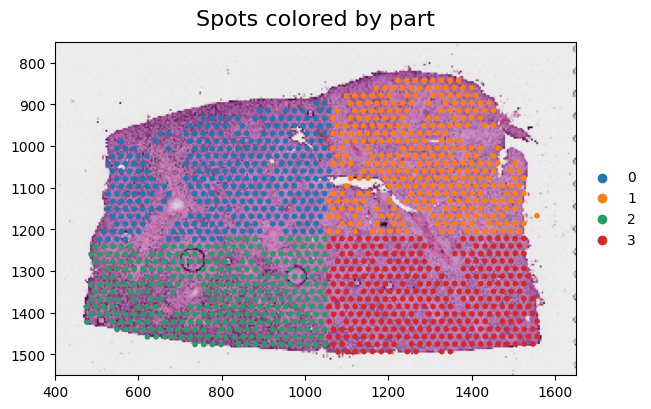

In [169]:
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="part").pl.show("downscaled_hires")
ax = plt.gca()
ax.set_xlim(400,1650)
ax.set_ylim(1550, 750) 
ax.set_title("Spots colored by part",fontsize=16, pad=12)

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/1056421616.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="dominant_celltype_visium_rctd_2x2").pl.show("downscaled_hires")
/tmp/ipykernel_4291/1056421616.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="dominant_celltype_visium_rctd_2x2").pl.show("downscaled_hires")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/si

Text(0.5, 1.0, 'Dominant celltype rctd')

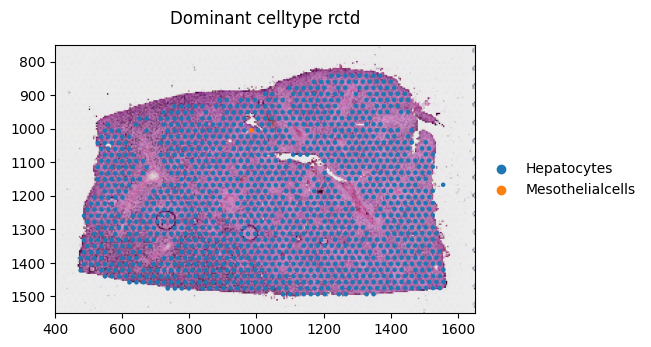

In [170]:
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="dominant_celltype_visium_rctd_2x2").pl.show("downscaled_hires")
ax = plt.gca()
ax.set_xlim(400,1650)
ax.set_ylim(1550, 750) 
ax.set_title("Dominant celltype rctd", fontsize=12, pad=15)

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/575470659.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_rctd").pl.show("downscaled_hires")
/tmp/ipykernel_4291/575470659.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_rctd").pl.show("downscaled_hires")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].


INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/575470659.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="part").pl.show("downscaled_hires")
/tmp/ipykernel_4291/575470659.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="part").pl.show("downscaled_hires")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning:

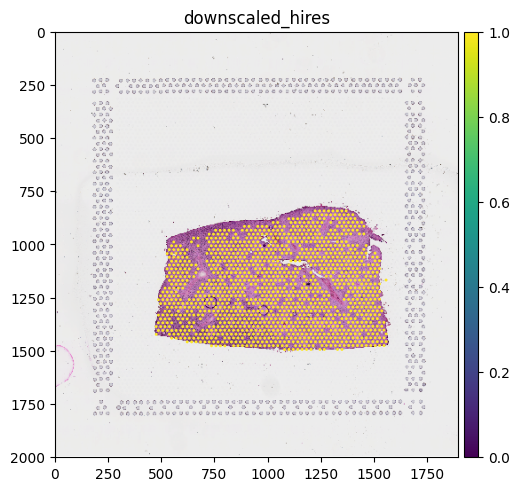

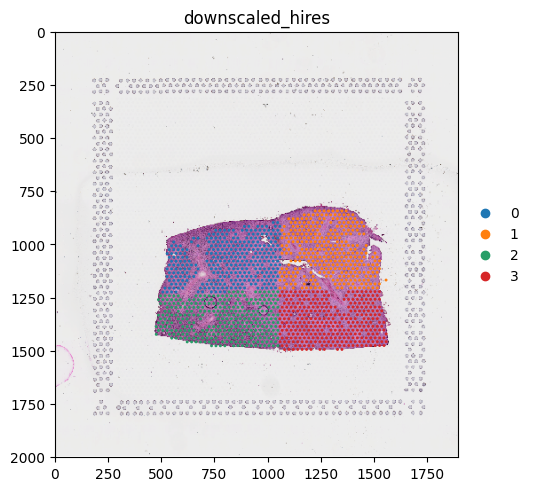

In [171]:
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_rctd").pl.show("downscaled_hires")
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="part").pl.show("downscaled_hires")

In [48]:
print(sdata.table.obsm[f"visium_{method}_2x2"])
print(sdata.table.obsm[f"visium_{method}"].to_numpy())
print(sdata.table.obsm["visium_rctd"].dtypes)

                    Bcells  CentralVeinEndothelialcells  Cholangiocytes  \
AAACACCAATAACTGC-1     0.0                          0.0             0.0   
AAACATTTCCCGGATT-1     0.0                          0.0             0.0   
AAACCCGAACGAAATC-1     0.0                          0.0             0.0   
AAACCGGGTAGGTACC-1     0.0                          0.0             0.0   
AAACCGTTCGTCCAGG-1     0.0                          0.0             0.0   
...                    ...                          ...             ...   
TTGTGGTGGTACTAAG-1     0.0                          0.0             0.0   
TTGTGTATGCCACCAA-1     0.0                          0.0             0.0   
TTGTTGTGTGTCAAGA-1     0.0                          0.0             0.0   
TTGTTTCATTAGTCTA-1     0.0                          0.0             0.0   
TTGTTTCCATACAACT-1     0.0                          0.0             0.0   

                    Hepatocytes  Kupffercells  LSECs  Mesothelialcells  \
AAACACCAATAACTGC-1     0.

/tmp/ipykernel_4291/3070784412.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(sdata.table.obsm[f"visium_{method}_2x2"])
/tmp/ipykernel_4291/3070784412.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(sdata.table.obsm[f"visium_{method}"].to_numpy())
/tmp/ipykernel_4291/3070784412.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(sdata.table.obsm["visium_rctd"].dtypes)


SpatialData object
├── Images
│     ├── 'GSM5764414_JBO001_hires_image': DataArray[cyx] (3, 2000, 1896)
│     └── 'GSM5764414_JBO001_lowres_image': DataArray[cyx] (3, 600, 569)
├── Shapes
│     └── 'GSM5764414_JBO001': GeoDataFrame shape: (1293, 3) (2D shapes)
└── Tables
      └── 'table': AnnData (1293, 31053)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        GSM5764414_JBO001_hires_image (Images), GSM5764414_JBO001 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        GSM5764414_JBO001_lowres_image (Images), GSM5764414_JBO001 (Shapes)
    ▸ 'global', with elements:
        GSM5764414_JBO001 (Shapes)
INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_9782/1470089978.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
/tmp/ipykernel_9782/1470089978.py:3: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  .pl.render_shapes(elements="GSM5764414_JBO001", color="random_part")\
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_acti

Text(0.5, 1.0, 'Training in batches')

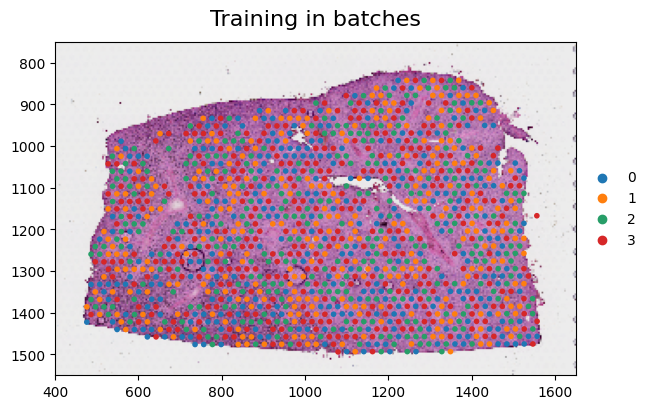

In [23]:
print(sdata)
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
      .pl.render_shapes(elements="GSM5764414_JBO001", color="random_part")\
      .pl.show("downscaled_hires")

ax = plt.gca()
ax.set_xlim(400,1650)
ax.set_ylim(1550, 750) 
ax.set_title("Training in batches", fontsize=16, pad=12)
#plt.show()

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/1777827644.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
/tmp/ipykernel_4291/1777827644.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  .pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_rctd_cat")\
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please s

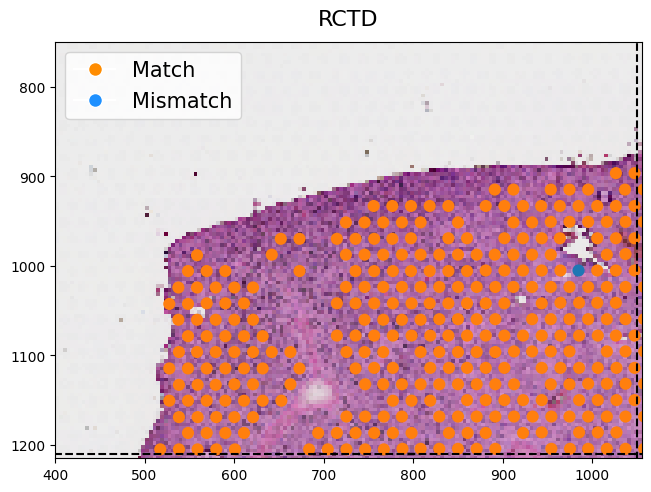

In [53]:
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
      .pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_rctd_cat")\
      .pl.show("downscaled_hires")

ax = plt.gca()
ax.set_xlim(400,1055)
ax.set_ylim(1215, 750) 
ax.set_title("RCTD", fontsize=16, pad=12)
ax.vlines(x=1050, ymin=0, ymax=2000, color="black", linestyle="--")
ax.hlines(y=1210, xmin=0, xmax=2000, color="black", linestyle="--")

# Custom legend entries
custom_legend = [    Line2D([0], [0], marker='o', color='w', label='Match',
           markerfacecolor='darkorange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mismatch',
           markerfacecolor='dodgerblue', markersize=10)
]

# Add legend to the plot
ax.legend(handles=custom_legend, loc='upper left', frameon=True, fontsize = 15)

#plt.show()

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/3509518159.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
/tmp/ipykernel_4291/3509518159.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  .pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_cell2loc_cat")\
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Plea

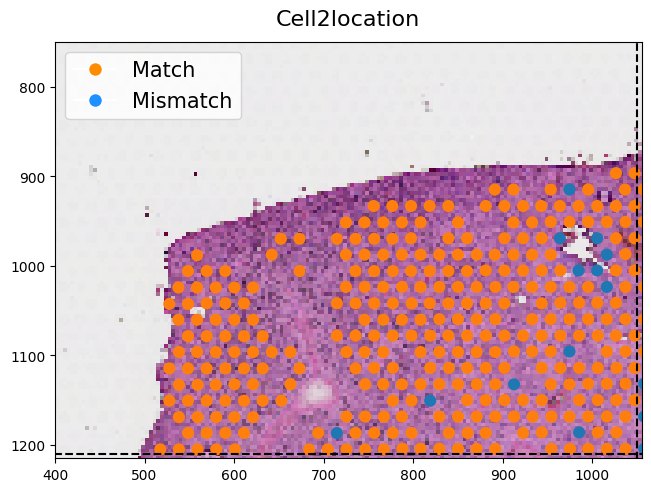

In [54]:
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
      .pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_cell2loc_cat")\
      .pl.show("downscaled_hires")

ax = plt.gca()
ax.set_xlim(400,1055)
ax.set_ylim(1215, 750) 
ax.set_title("Cell2location", fontsize=16, pad=12)
ax.vlines(x=1050, ymin=0, ymax=2000, color="black", linestyle="--")
ax.hlines(y=1210, xmin=0, xmax=2000, color="black", linestyle="--")

# Custom legend entries
custom_legend = [    Line2D([0], [0], marker='o', color='w', label='Match',
           markerfacecolor='darkorange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mismatch',
           markerfacecolor='dodgerblue', markersize=10)
]

# Add legend to the plot
ax.legend(handles=custom_legend, loc='upper left', frameon=True, fontsize = 15)
#plt.show()

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_4291/1361030269.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
/tmp/ipykernel_4291/1361030269.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  .pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_cell2loc_2x2_run2_cat")\
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:777: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future vers

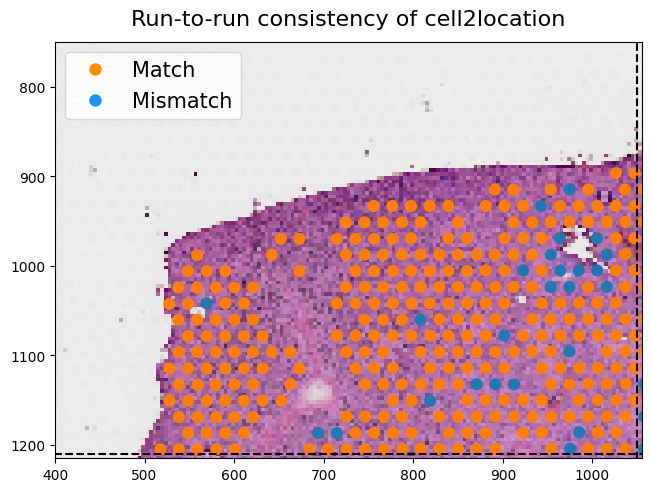

In [133]:
sdata.pl.render_images(elements="GSM5764414_JBO001_hires_image")\
      .pl.render_shapes(elements="GSM5764414_JBO001", color="match_visium_cell2loc_2x2_run2_cat")\
      .pl.show("downscaled_hires")

ax = plt.gca()
ax.set_xlim(400,1055)
ax.set_ylim(1215, 750) 
ax.set_title("Run-to-run consistency of cell2location", fontsize=16, pad=12)
ax.vlines(x=1050, ymin=0, ymax=2000, color="black", linestyle="--")
ax.hlines(y=1210, xmin=0, xmax=2000, color="black", linestyle="--")

# Custom legend entries
custom_legend = [    Line2D([0], [0], marker='o', color='w', label='Match',
           markerfacecolor='darkorange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mismatch',
           markerfacecolor='dodgerblue', markersize=10)
]

# Add legend to the plot
ax.legend(handles=custom_legend, loc='upper left', frameon=True, fontsize = 15)

#plt.show()

In [55]:
adata = sdata.table
print(adata.uns)
print(sdata.table)
print(sdata.table.obsm["visium_nnls"].columns)

OrderedDict({'spatial': {'GSM5764414_JBO001': {'metadata': {'chemistry_description': "Spatial 3' v1", 'software_version': 'spaceranger-1.0.0'}}}, 'spatialdata_attrs': {'region': 'GSM5764414_JBO001', 'region_key': 'region', 'instance_key': 'spot_id'}})
AnnData object with n_obs × n_vars = 1293 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'spot_ind', 'part', 'total_n_UMI_per_spot', 'n_genes_by_counts', 'dominant_celltype_visium_cell2loc', 'dominant_celltype_visium_rctd', 'dominant_celltype_visium_nnls', 'dominant_celltype_visium_cell2loc_2x2', 'dominant_celltype_visium_nnls_2x2', 'dominant_celltype_visium_rctd_2x2', 'dominant_celltype_visium_cell2loc_run2', 'match_visium_rctd', 'match_visium_cell2loc', 'match_visium_nnls', 'random_part', 'match_visium_rctd_cat', 'match_visium_cell2loc_cat', 'match_visium_nnls_cat'
    var: 'gene_ids', 'feature_types', 'genome', 'n_spots_by_counts'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial', 'visium_cell2lo

/tmp/ipykernel_4291/2665310574.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  adata = sdata.table
/tmp/ipykernel_4291/2665310574.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(sdata.table)
/tmp/ipykernel_4291/2665310574.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(sdata.table.obsm["visium_nnls"].columns)


In [56]:
spot_counts = sdata.table.obs.groupby("part").size().reset_index(name="Number of spots")
display(spot_counts)

/tmp/ipykernel_4291/296937264.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  spot_counts = sdata.table.obs.groupby("part").size().reset_index(name="Number of spots")
/tmp/ipykernel_4291/296937264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spot_counts = sdata.table.obs.groupby("part").size().reset_index(name="Number of spots")


,part,Number of spots
0,0,324
1,1,323
2,2,323
3,3,323


In [26]:
for method in ["rctd", "nnls", "cell2loc"]:
    for i in sdata.table.obsm["visium_nnls"].columns:
        sdata.table.obsm[f"ratio_cell_types_{method}"] = sdata.table.obsm[f"visium_{method}"].iloc[:,:-1]/sdata.table.obsm[f"visium_{method}_2x2"].iloc[:,:-1]

/tmp/ipykernel_3933/1562846309.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  for i in sdata.table.obsm["visium_nnls"].columns:
/tmp/ipykernel_3933/1562846309.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obsm[f"ratio_cell_types_{method}"] = sdata.table.obsm[f"visium_{method}"].iloc[:,:-1]/sdata.table.obsm[f"visium_{method}_2x2"].iloc[:,:-1]


/tmp/ipykernel_3933/4115981810.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df = sdata.table.obsm[key]


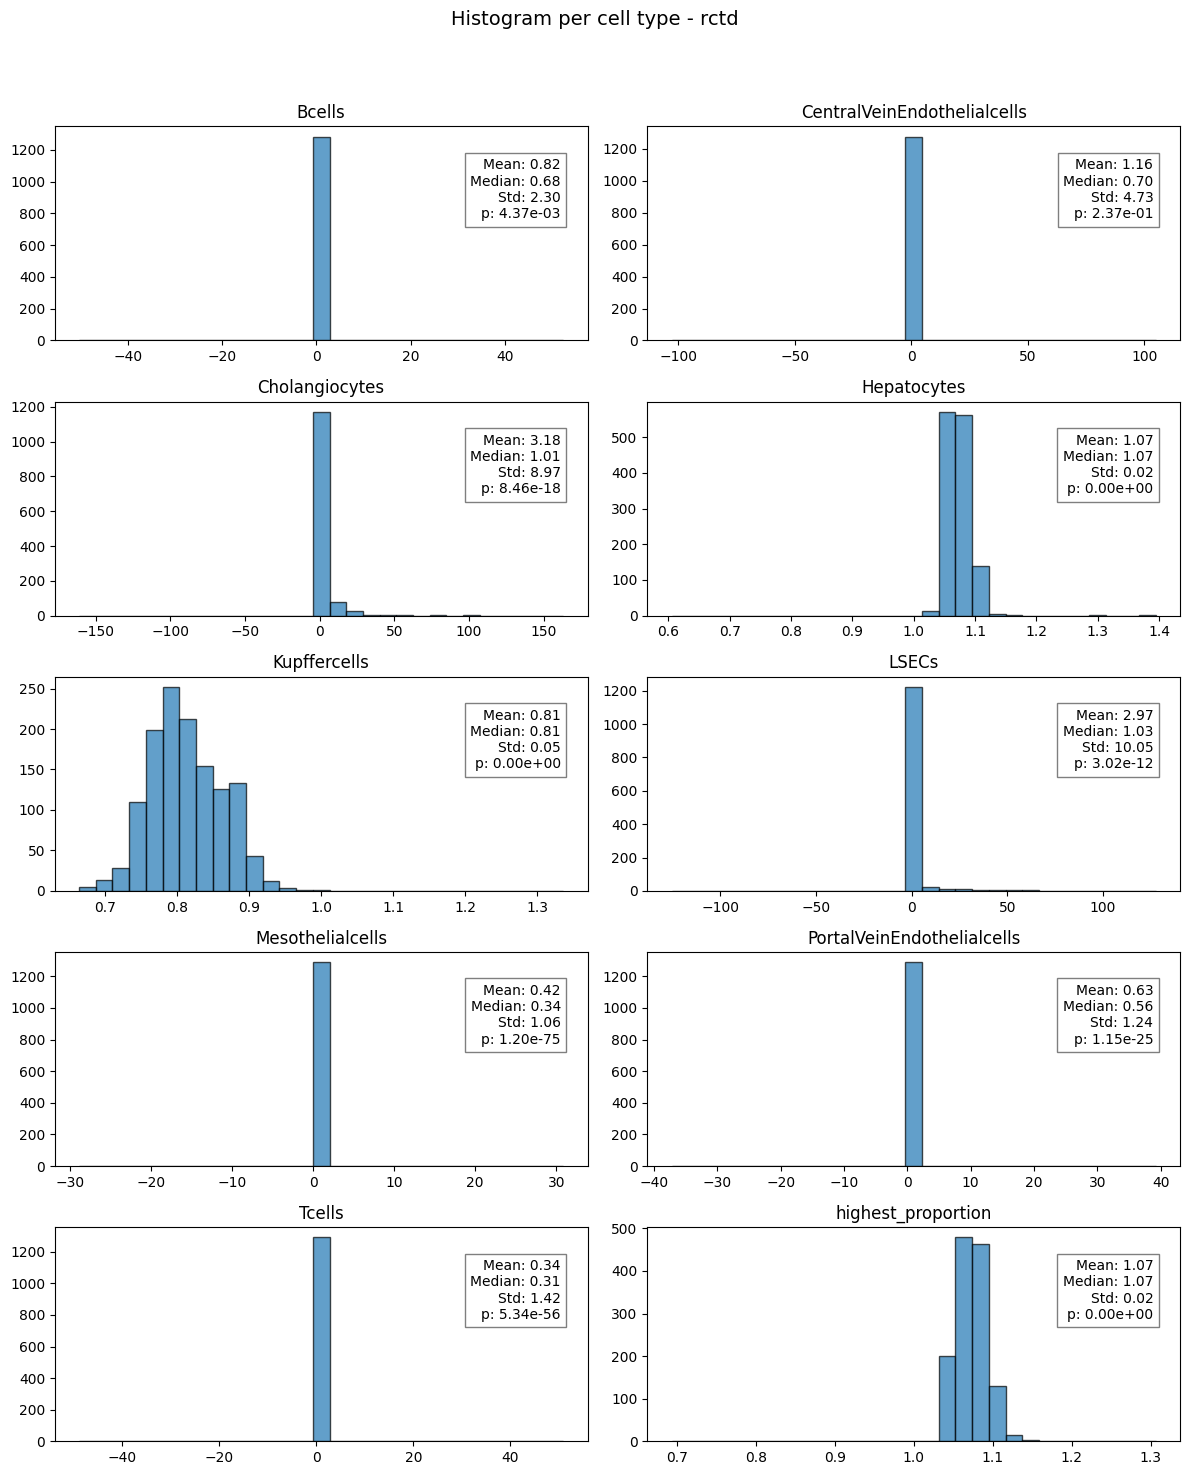

/tmp/ipykernel_3933/4115981810.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df = sdata.table.obsm[key]
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Pre

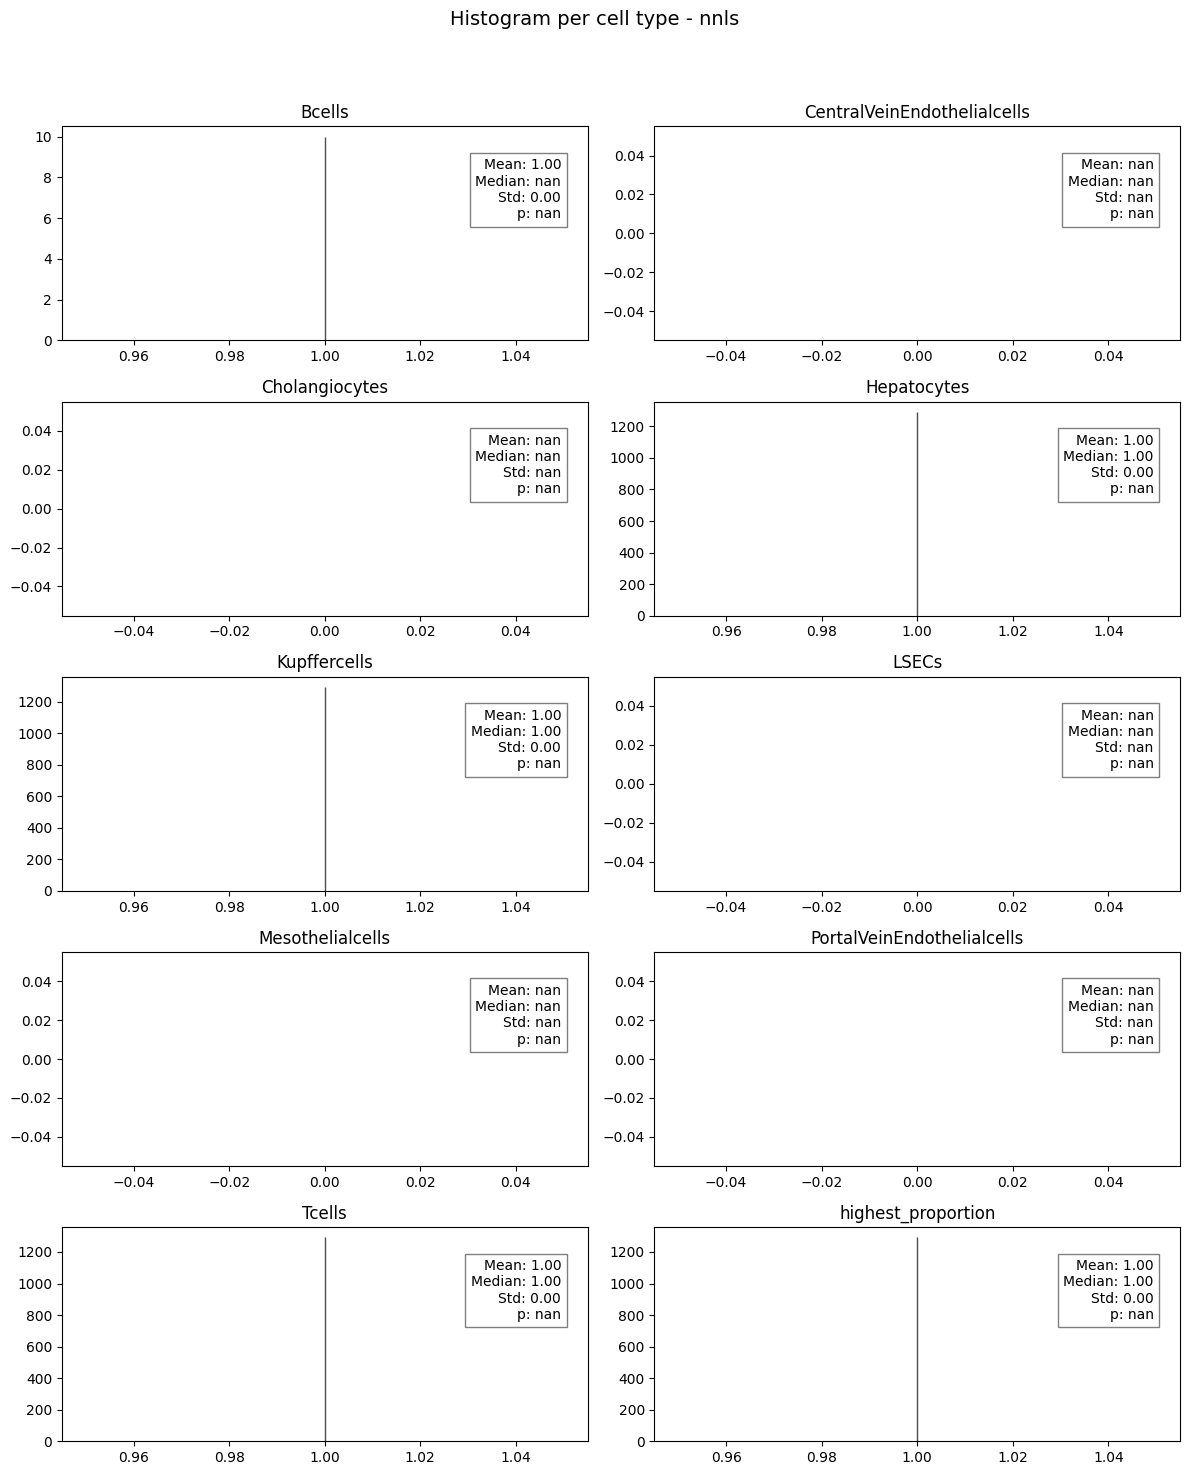

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

for method in ["rctd", "nnls"]:
    key = f"ratio_cell_types_{method}"
    df = sdata.table.obsm[key]

    n_cols = 2
    n_rows = int(np.ceil(len(df.columns) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
    axes = axes.flatten()

    for idx, col in enumerate(df.columns):
        data = df[col].astype(float)

        mean_value = np.mean(data)
        std_dev = np.std(data)
        median = np.median(data)
        t_stat, p_value = stats.ttest_1samp(data, 1)

        bin_range = max(abs(data.min() - 1), abs(data.max() - 1))
        bins = np.linspace(1 - bin_range, 1 + bin_range, 30)

        ax = axes[idx]
        ax.hist(data, bins=bins, edgecolor="black", alpha=0.7)
        ax.set_title(f'{col}', fontsize=12)

        ax.text(
            0.95, 0.85,
            f'Mean: {mean_value:.2f}\nMedian: {median:.2f}\nStd: {std_dev:.2f}\np: {p_value:.2e}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')
        )

    # Hide unused subplots if any
    for k in range(idx + 1, len(axes)):
        axes[k].axis('off')

    plt.suptitle(f"Histogram per cell type - {method}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


/tmp/ipykernel_4479/3279313202.py:9: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  cell_types = sdata.table.obsm[first_key].columns
/tmp/ipykernel_4479/3279313202.py:21: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df = sdata.table.obsm[key]
/tmp/ipykernel_4479/3279313202.py:21: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df = sdata.table.obsm[key]
/tmp/ipykernel_4479/3279313202.py:21: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df = sdata.table.obsm[key]
/tmp/ipykernel_4479/3279313202.py:21: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df = sdata.table.obsm[key]
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6

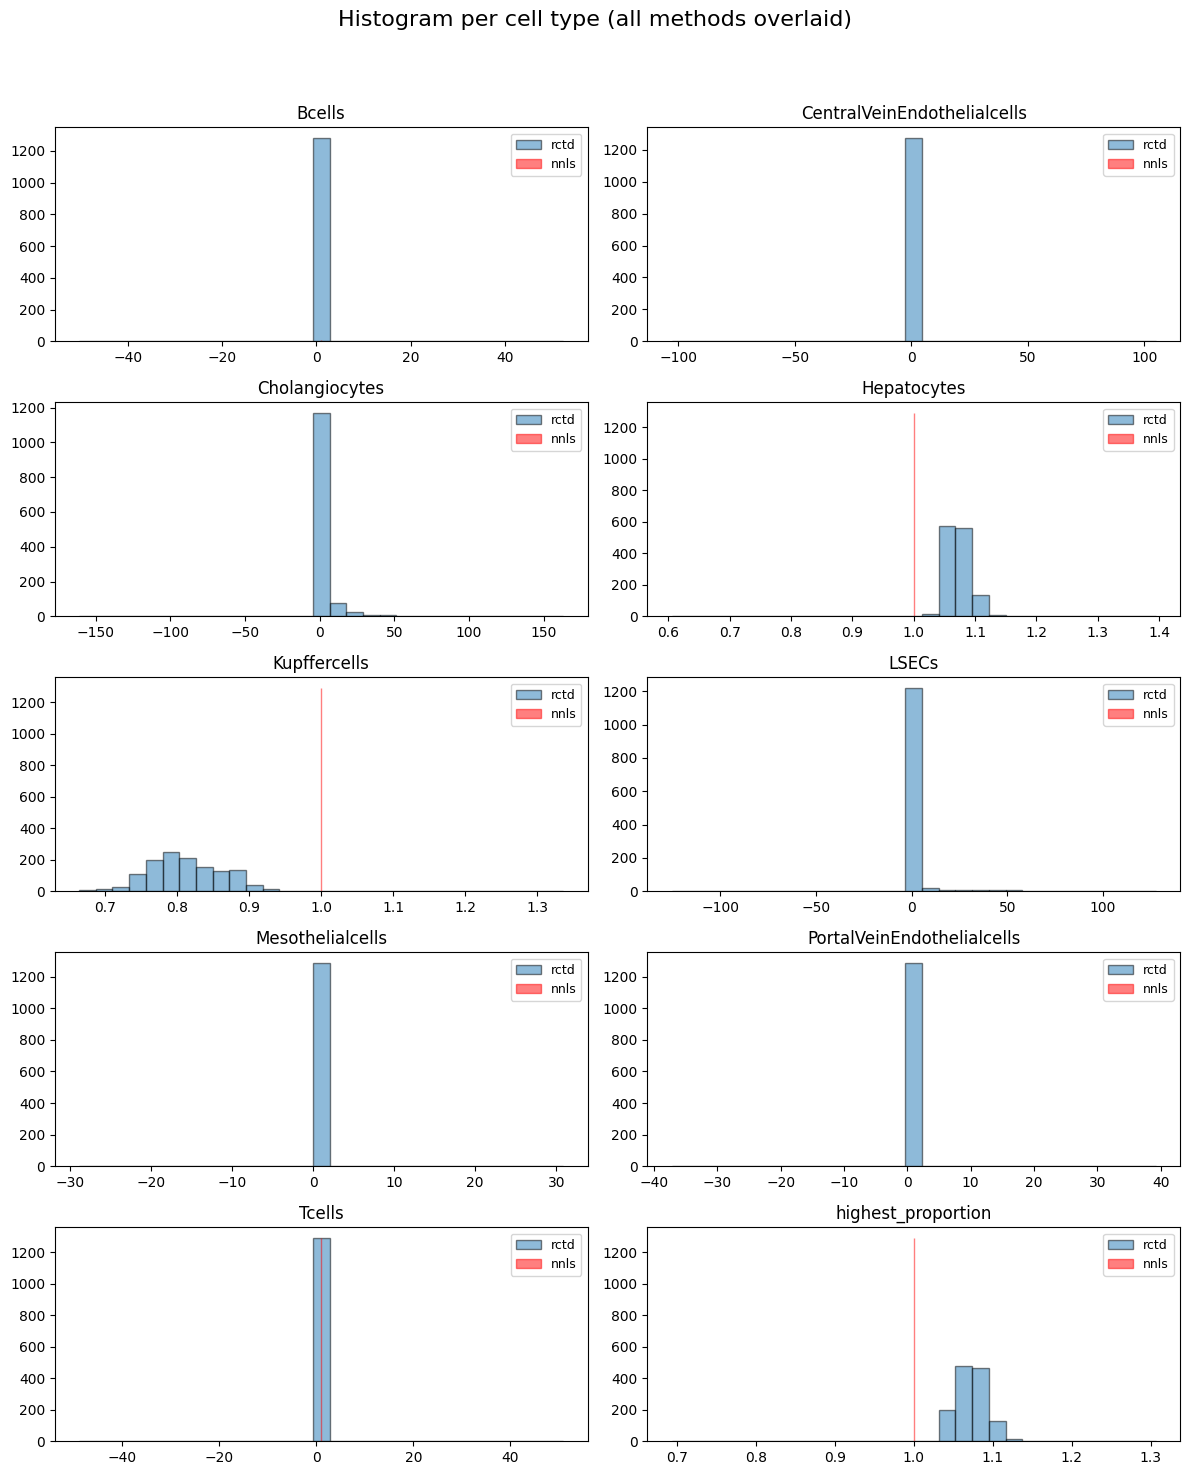

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

methods = ["rctd","nnls"]

# Neem de lijst van celtypes aan uit de eerste methode
first_key = f"ratio_cell_types_{methods[0]}"
cell_types = sdata.table.obsm[first_key].columns

n_cols = 2
n_rows = int(np.ceil(len(cell_types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for idx, cell_type in enumerate(cell_types):
    ax = axes[idx]

    for method in methods:
        key = f"ratio_cell_types_{method}"
        df = sdata.table.obsm[key]
        data = df[cell_type].astype(float)

        mean_value = np.mean(data)
        std_dev = np.std(data)
        median = np.median(data)
        t_stat, p_value = stats.ttest_1samp(data, 1)

        bin_range = max(abs(data.min() - 1), abs(data.max() - 1))
        bins = np.linspace(1 - bin_range, 1 + bin_range, 30)

        if method == "rctd":
            ax.hist(data, bins=bins, alpha=0.5, label=method, edgecolor='black')
        else:
            ax.hist(data, bins=bins, alpha=0.5,  color = 'red', label=method, edgecolor='red')

    ax.set_title(f'{cell_type}', fontsize=12)
    ax.legend(fontsize=9)
    

# Verberg ongebruikte subplot-assen
for k in range(len(cell_types), len(axes)):
    axes[k].axis('off')

plt.suptitle("Histogram of ratios per cell type", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



/tmp/ipykernel_4291/2241926494.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  part0_mask = sdata.table.obs["part"] == 0
/tmp/ipykernel_4291/2241926494.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  cell_types = sdata.table.obsm[first_key].columns[:-1]
/tmp/ipykernel_4291/2241926494.py:27: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_visium = sdata.table.obsm[key_visium].iloc[part0_mask.values, :-1]
/tmp/ipykernel_4291/2241926494.py:28: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_split = sdata.table.obsm[key_split].iloc[part0_mask.values, :-1]
/tmp/ipykernel_4291/2241926494.py:27: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_visium = sdata.

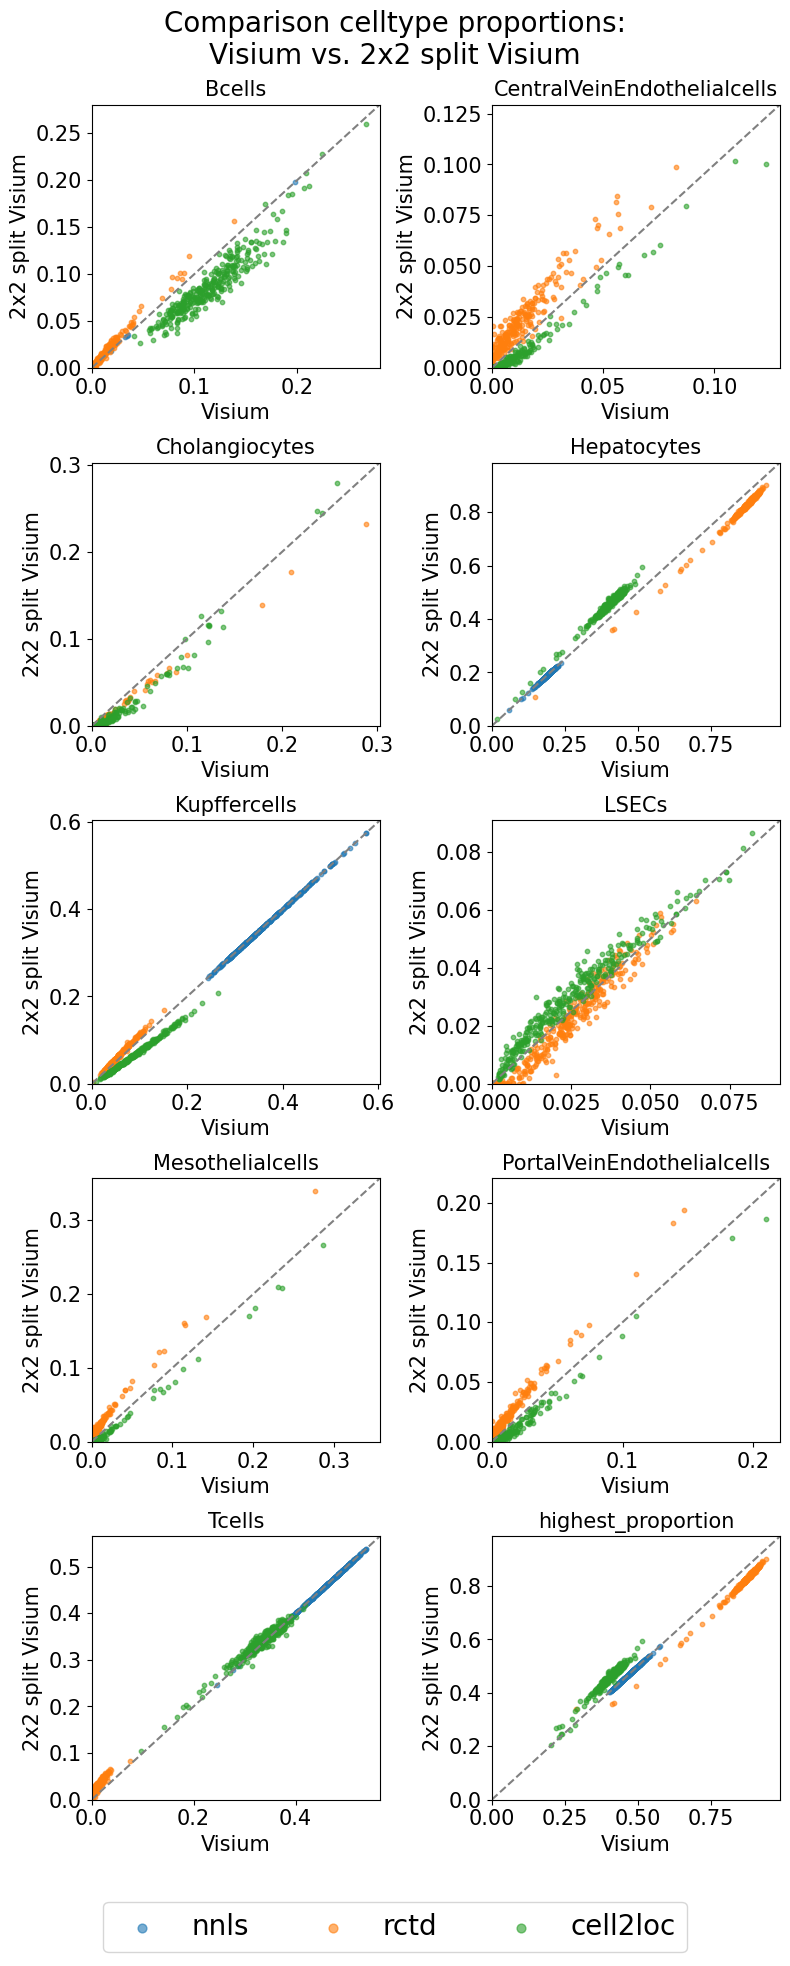

In [143]:

methods = ["nnls", "rctd", "cell2loc"]


part0_mask = sdata.table.obs["part"] == 0

first_key = f"visium_{methods[0]}"
cell_types = sdata.table.obsm[first_key].columns[:-1]

n_cols = 2
n_rows = int(np.ceil(len(cell_types) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 4))
axes = axes.flatten()


legend_entries = {}

for idx, cell_type in enumerate(cell_types):
    ax = axes[idx]

    all_x = []
    all_y = []

    for method in methods:
        key_visium = f"visium_{method}"
        key_split = f"visium_{method}_2x2"

        df_visium = sdata.table.obsm[key_visium].iloc[part0_mask.values, :-1]
        df_split = sdata.table.obsm[key_split].iloc[part0_mask.values, :-1]

        x = df_visium[cell_type].astype(float)
        y = df_split[cell_type].astype(float)

        all_x.append(x)
        all_y.append(y)

        sc = ax.scatter(x, y, alpha=0.6, label=method, s=10)

        if method not in legend_entries:
            legend_entries[method] = sc

    x_concat = np.concatenate(all_x)
    y_concat = np.concatenate(all_y)
    lim = max(x_concat.max(), y_concat.max()) * 1.05
    ax.set_xlim(0, lim)
    ax.set_ylim(0, lim)


    ax.set_title(f'{cell_type}', fontsize=15)
    ax.set_xlabel("Visium", fontsize=15)
    ax.set_ylabel("2x2 split Visium", fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.plot([0, lim], [0, lim], ls='--', color='gray')

fig.legend(
    legend_entries.values(),
    legend_entries.keys(),
    loc='lower center',
    ncol=len(methods),
    fontsize=20,
    markerscale=2 
)


plt.suptitle("Comparison celltype proportions:\nVisium vs. 2x2 split Visium", fontsize=20)
plt.tight_layout(rect=[0, 0.05, 1, 0.99])
plt.show()


/tmp/ipykernel_3933/1402411817.py:7: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  part0_mask = sdata.table.obs["part"] == 0
/tmp/ipykernel_3933/1402411817.py:27: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_visium = sdata.table.obsm[key_visium].iloc[part0_mask.values, :-1]
/tmp/ipykernel_3933/1402411817.py:28: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_split = sdata.table.obsm[key_split].iloc[part0_mask.values, :-1]
/tmp/ipykernel_3933/1402411817.py:27: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_visium = sdata.table.obsm[key_visium].iloc[part0_mask.values, :-1]
/tmp/ipykernel_3933/1402411817.py:28: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  d

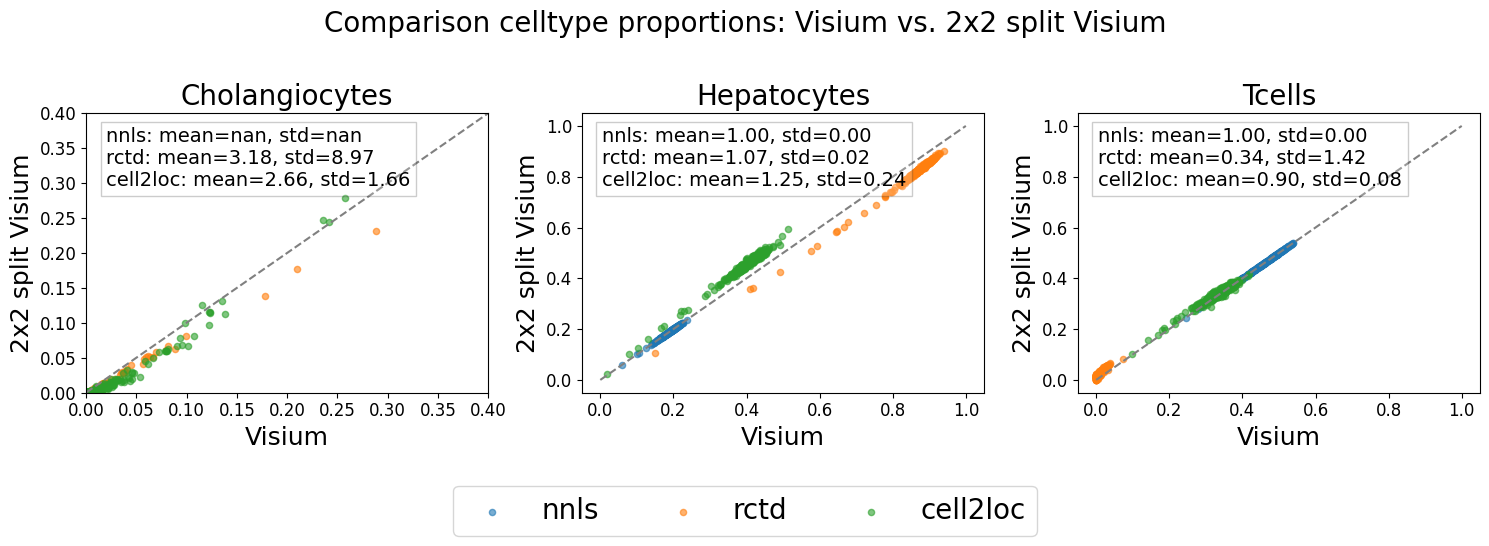

In [49]:
import matplotlib.pyplot as plt
import numpy as np

methods = ["nnls", "rctd", "cell2loc"]

# Alleen part 0 gebruiken
part0_mask = sdata.table.obs["part"] == 0

# Alleen de gewenste celtypes
cell_types = ["Cholangiocytes", "Hepatocytes", "Tcells"]

n_cols = 3
n_rows = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
axes = axes.flatten()

# Verzamel legend handles en labels
legend_entries = {}

for idx, cell_type in enumerate(cell_types):
    ax = axes[idx]

    for method in methods:
        key_visium = f"visium_{method}"
        key_split = f"visium_{method}_2x2"

        df_visium = sdata.table.obsm[key_visium].iloc[part0_mask.values, :-1]
        df_split = sdata.table.obsm[key_split].iloc[part0_mask.values, :-1]

        x = df_visium[cell_type].astype(float)
        y = df_split[cell_type].astype(float)

        sc = ax.scatter(x, y, alpha=0.6, label=method, s=20)

        if method not in legend_entries:
            legend_entries[method] = sc

    # Titel en labels groter
    ax.set_title(f'{cell_type}', fontsize=20)
    ax.set_xlabel("Visium", fontsize=18)
    ax.set_ylabel("2x2 split Visium", fontsize=18)

    ax.tick_params(axis='both', labelsize=12)
    ax.plot([0, 1], [0, 1], ls='--', color='gray')

    # Beperk assen voor cholangiocytes
    if cell_type == "Cholangiocytes":
        ax.set_xlim(0, 0.4)
        ax.set_ylim(0, 0.4)

    # Info-kader met mean/std
    stats_text = "\n".join(
        f"{method}: mean={np.mean(sdata.table.obsm[f'ratio_cell_types_{method}'][cell_type]):.2f}, std={np.std(sdata.table.obsm[f'ratio_cell_types_{method}'][cell_type]):.2f}"
        for method in methods
    )

    ax.text(
        0.05, 0.95,
        stats_text,
        transform=ax.transAxes,
        fontsize=14,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.2, edgecolor='black')
    )

# Verberg ongebruikte subplot-assen (indien nodig)
for k in range(len(cell_types), len(axes)):
    axes[k].axis('off')

# Legenda onderaan, groter font
#fig.legend(legend_entries.values(), legend_entries.keys(), loc='lower center', ncol=len(methods), fontsize=20)
fig.legend(
    legend_entries.values(),
    legend_entries.keys(),
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),  # 0.5 = horizontaal gecentreerd, -0.05 = lager onder de plot
    ncol=len(methods),
    fontsize=20
)

plt.suptitle("Comparison celltype proportions: Visium vs. 2x2 split Visium", fontsize=20)
plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.show()



In [88]:
df_visium = sdata.table.obsm[key_visium].iloc[:,:-1]
df_visium

/tmp/ipykernel_4479/1573076020.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  df_visium = sdata.table.obsm[key_visium].iloc[:,:-1]


,Bcells,CentralVeinEndothelialcells,Cholangiocytes,Hepatocytes,Kupffercells,LSECs,Mesothelialcells,PortalVeinEndothelialcells,Tcells,highest_proportion
AAACACCAATAACTGC-1,0.0,0,0,0.205238,0.325084,0,0,0,0.469678,0.469678
AAACATTTCCCGGATT-1,0.0,0,0,0.171507,0.392942,0,0,0,0.435551,0.435551
AAACCCGAACGAAATC-1,0.0,0,0,0.223893,0.285961,0,0,0,0.490146,0.490146
AAACCGGGTAGGTACC-1,0.0,0,0,0.222962,0.255572,0,0,0,0.521466,0.521466
AAACCGTTCGTCCAGG-1,0.0,0,0,0.190666,0.354315,0,0,0,0.455019,0.455019
...,...,...,...,...,...,...,...,...,...,...
TTGTGGTGGTACTAAG-1,0.0,0,0,0.193051,0.319402,0,0,0,0.487547,0.487547
TTGTGTATGCCACCAA-1,0.0,0,0,0.164028,0.337494,0,0,0,0.498479,0.498479
TTGTTGTGTGTCAAGA-1,0.0,0,0,0.197687,0.376274,0,0,0,0.426039,0.426039
TTGTTTCATTAGTCTA-1,0.0,0,0,0.208985,0.289113,0,0,0,0.501902,0.501902
